### Objectives:
Perform exploratory Data Analysis using Pandas, Matplotlib or seaborn

### **Analysis Objectives**  
1. **Payment Methods and Sales Distribution**:  
   - How do different shopping malls utilize payment methods, and how does this affect their overall sales?  
   - Do malls with diverse payment options generate higher sales than others?  

2. **Product Categories and Customer Demographics**:  
   - Which product categories are driving sales in the top-performing malls?  
   
3. **Quantity, Pricing Correlation, customer Demographics, behavior, and trends**:    
   - Is there a significant relationship between product categories and customer demographics, such as gender and age?  
    - Is there a correlation between product quantity sold and pricing across all malls?
    - What trends can be observed in customer purchasing behavior based on gender, age, and payment methods? 
   - Do top-performing malls attract specific customer demographics more than others?


In [7]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("data.csv")
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


### Which mall has the highest sales

In [69]:
# how much each of these malls are generating and rank themin descending order

mall_sales = df.groupby('shopping_mall')['price'].sum().reset_index()
mall_sales = mall_sales.sort_values(by='price', ascending=False)
mall_sales


,shopping_mall,price
5,Mall of Istanbul,13851737.62
4,Kanyon,13710755.24
6,Metrocity,10249980.07
7,Metropol AVM,6937992.99
3,Istinye Park,6717077.54
9,Zorlu Center,3509649.02
0,Cevahir AVM,3433671.84
8,Viaport Outlet,3414019.46
1,Emaar Square Mall,3390408.31
2,Forum Istanbul,3336073.82


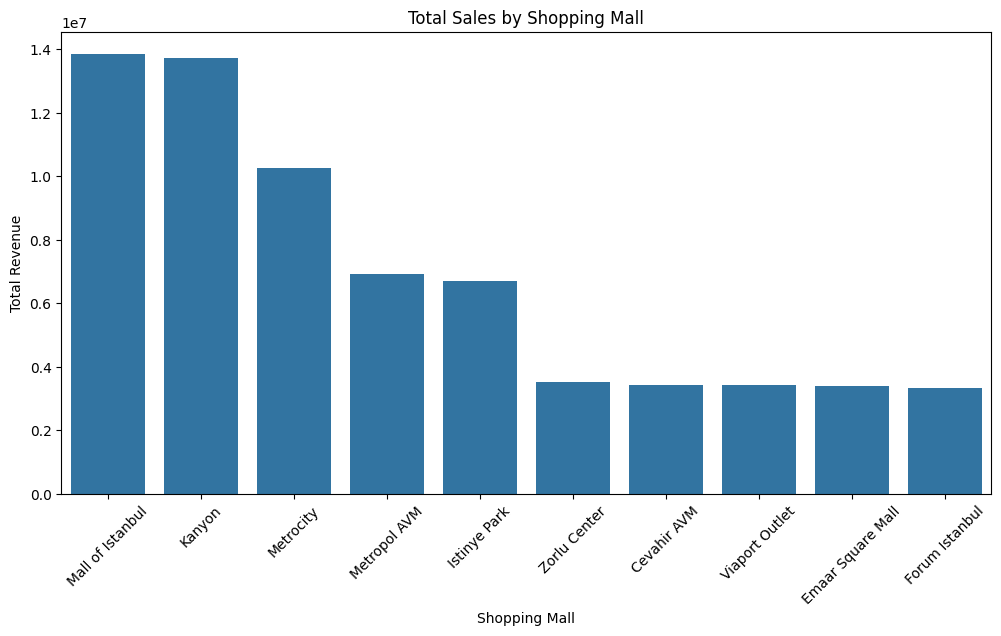

In [70]:

plt.figure(figsize=(12, 6))
sns.barplot(x='shopping_mall', y='price', data=mall_sales)
plt.title('Total Sales by Shopping Mall')
plt.ylabel('Total Revenue')
plt.xlabel('Shopping Mall')
plt.xticks(rotation=45)
plt.show()


### How does payment options affect their overall sales? Do malls with diverse payment options generate higher sales than others?  


In [71]:
payment_distribution = df.groupby(['shopping_mall', 'payment_method']).size().reset_index(name='count')
payment_distribution.head(10)

,shopping_mall,payment_method,count
0,Cevahir AVM,Cash,2228
1,Cevahir AVM,Credit Card,1779
2,Cevahir AVM,Debit Card,984
3,Emaar Square Mall,Cash,2114
4,Emaar Square Mall,Credit Card,1696
5,Emaar Square Mall,Debit Card,1001
6,Forum Istanbul,Cash,2183
7,Forum Istanbul,Credit Card,1750
8,Forum Istanbul,Debit Card,1014
9,Istinye Park,Cash,4436


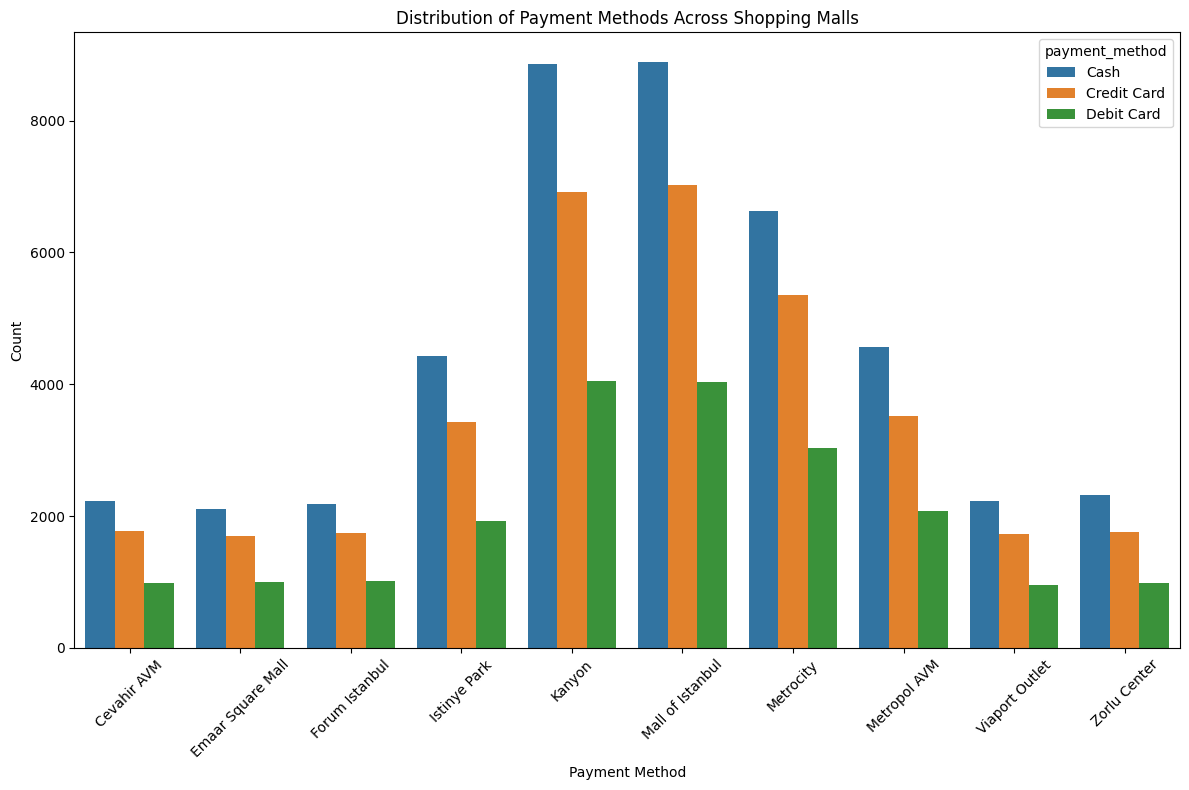

In [52]:

plt.figure(figsize=(12, 8))
sns.barplot(x='shopping_mall', y='count', hue='payment_method', data=payment_distribution)
plt.ylabel("Count")
plt.xlabel("Payment Method")
plt.title('Distribution of Payment Methods Across Shopping Malls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   
   Each of the malls use the available payment options but we still notice that some malls outperform the others in terms of sales.  Let's explore the reason for this by looking into the products category.


2. **Product Categories and Customer Demographics**:  
   - Which product categories are most purchased across the top selling malls?  
   - Is there a significant relationship between product categories and customer demographics, such as gender and age?  


In [76]:
top_malls = mall_sales['shopping_mall'].head(5)  # Top 5 malls
category_sales = df[df['shopping_mall'].isin(top_malls)].groupby(['shopping_mall', 'category'])['price'].sum().reset_index()

# Sort by price within each mall
category_sales = category_sales.sort_values(by=['shopping_mall', 'price'], ascending=[True, False])
print(category_sales)


       shopping_mall         category       price
1       Istinye Park         Clothing  3050313.20
4       Istinye Park            Shoes  1806511.70
6       Istinye Park       Technology  1509900.00
2       Istinye Park        Cosmetics   178741.36
7       Istinye Park             Toys   109096.96
3       Istinye Park  Food & Beverage    23419.94
0       Istinye Park            Books    20725.20
5       Istinye Park         Souvenir    18369.18
9             Kanyon         Clothing  6155541.04
12            Kanyon            Shoes  3640031.05
14            Kanyon       Technology  3202500.00
10            Kanyon        Cosmetics   372242.30
15            Kanyon             Toys   214502.40
11            Kanyon  Food & Beverage    45474.85
8             Kanyon            Books    44980.35
13            Kanyon         Souvenir    35483.25
17  Mall of Istanbul         Clothing  6245565.04
20  Mall of Istanbul            Shoes  3668239.04
22  Mall of Istanbul       Technology  3220350.00


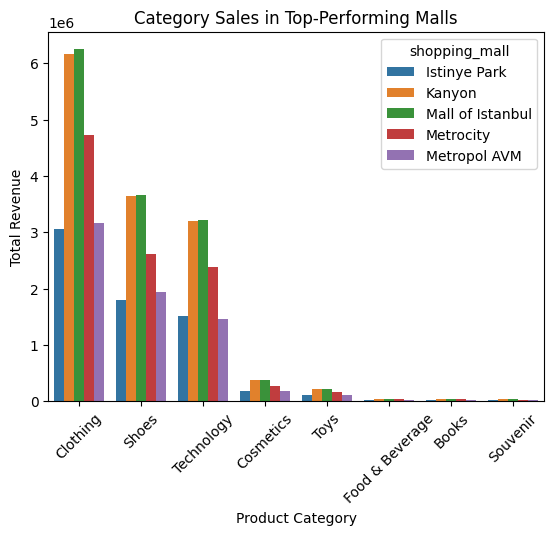

In [56]:
sns.barplot(x='category', y='price', hue='shopping_mall', data=category_sales)
plt.title('Category Sales in Top-Performing Malls')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


Clothing, shoes, and technological products are mostly purchased products. kanyon mall and mall of instabul lead the sales... metrocity, metropol AVM and Istinye park average with their sales on this category.

3. **Quantity, Pricing Correlation and customer Demographics**:    
   - Is there a significant relationship between product categories and customer demographics, such as gender and age?  
    - Is there a correlation between product quantity sold and pricing across all malls?


In [77]:
quantity_analysis = df[df['shopping_mall'].isin(top_malls)].groupby(['shopping_mall', 'category'])['quantity'].sum().reset_index()
quantity_analysis.head()


,shopping_mall,category,quantity
0,Istinye Park,Books,1368
1,Istinye Park,Clothing,10165
2,Istinye Park,Cosmetics,4396
3,Istinye Park,Food & Beverage,4478
4,Istinye Park,Shoes,3010


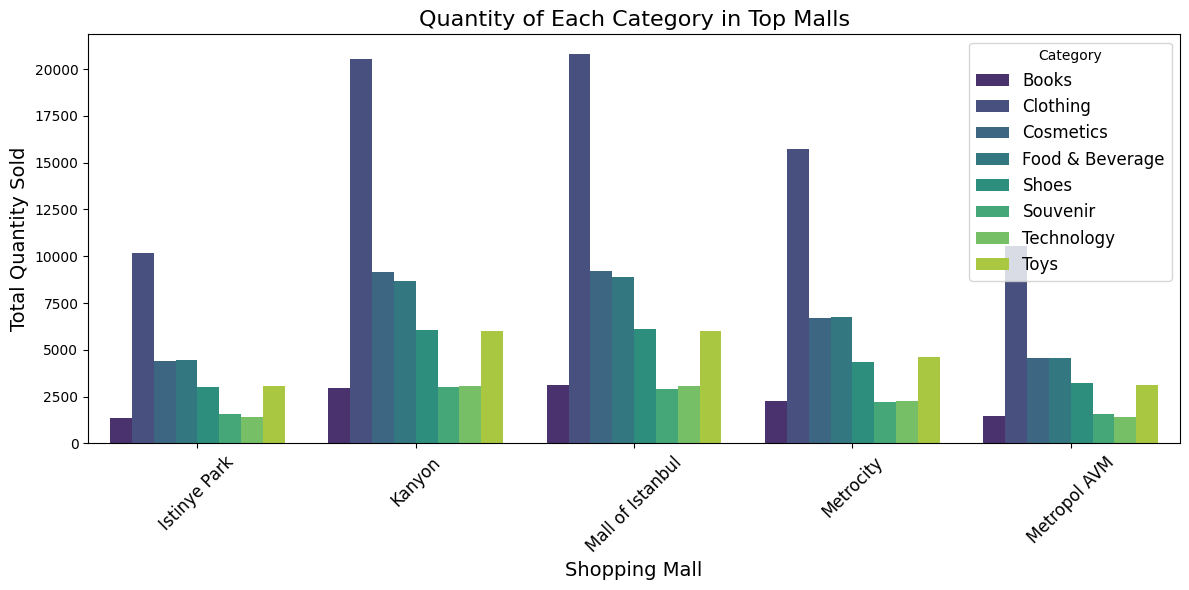

In [78]:

# Bar plot for quantity analysis by shopping mall and category
plt.figure(figsize=(12, 6))
sns.barplot(
    data=quantity_analysis, 
    x='shopping_mall', 
    y='quantity', 
    hue='category', 
    palette='viridis'
)

plt.title('Quantity of Each Category in Top Malls', fontsize=16)
plt.xlabel('Shopping Mall', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.tight_layout()
plt.show()


From the graph, we can see that the two leading malls, kanyon and Mall of Istanbul has more product categories than the other malls. This is probably the reason sales is higher at their stores becaus people feel that they can get a range of options if they shop there than any other store.

Let's look at how gender affect sales. This is important so we can know our target customers for each category to drive sales in that area.

In [19]:
category_gender = df.groupby(['category', "gender"])['quantity'].sum().reset_index()
category_gender

,category,gender,quantity
0,Books,Female,8776
1,Books,Male,6206
2,Clothing,Female,62039
3,Clothing,Male,41519
4,Cosmetics,Female,27261
5,Cosmetics,Male,18204
6,Food & Beverage,Female,26362
7,Food & Beverage,Male,17915
8,Shoes,Female,17906
9,Shoes,Male,12311


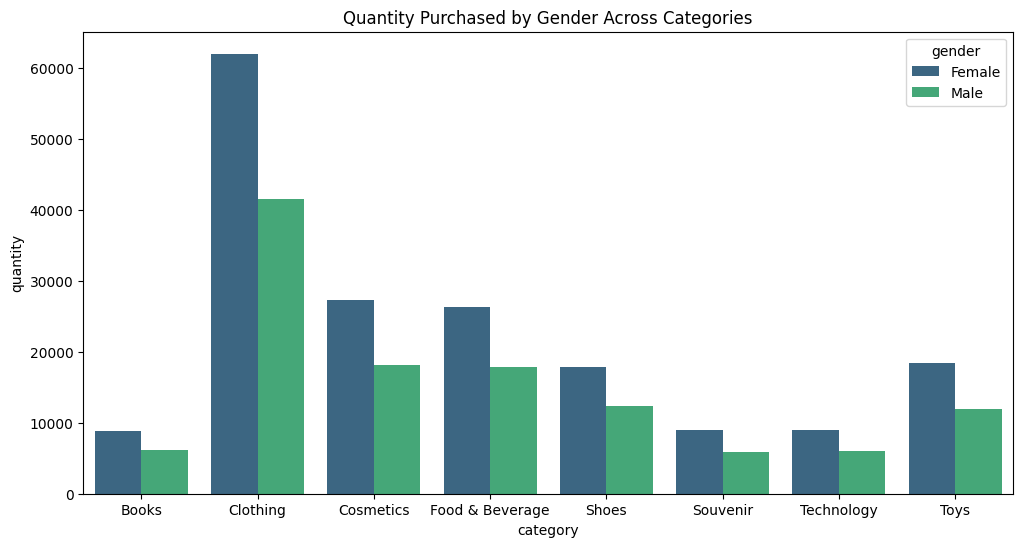

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='quantity', hue='gender', data=category_gender, palette='viridis')
plt.title('Quantity Purchased by Gender Across Categories')
plt.show()


In [85]:
correlation = df[['price', 'quantity']].corr()
print(correlation)


            price  quantity
price     1.00000   0.34488
quantity  0.34488   1.00000


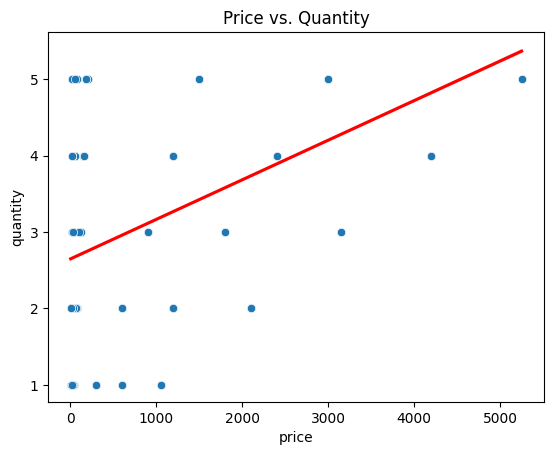

In [24]:
sns.scatterplot(x='price', y='quantity', data=df)
sns.regplot(x='price', y='quantity', data=df, scatter=False, color='red')
plt.title('Price vs. Quantity')
plt.show()


4. **Customer Behavior and Trends**:  
     
   - Do top-performing malls attract specific customer demographics more than others?


/tmp/ipykernel_1564/51487209.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = df.groupby(['age_group', 'category'])['price'].sum().reset_index()


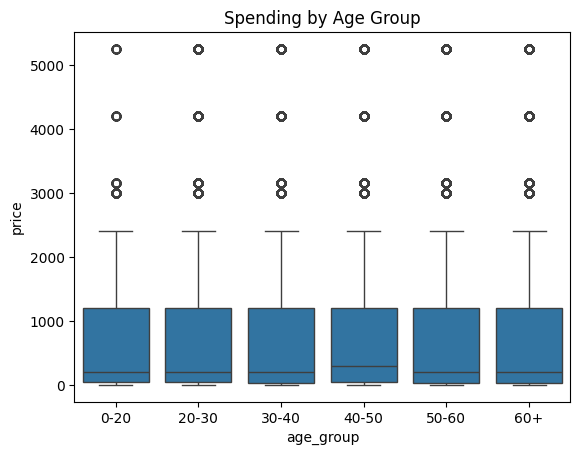

In [30]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60+'])
age_spending = df.groupby(['age_group', 'category'])['price'].sum().reset_index()
sns.boxplot(x='age_group', y='price', data=df)
plt.title('Spending by Age Group')
plt.show()


Seasonal Trends

In [92]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year

# group by monthly sales
monthly_sales = df.groupby('month')['quantity'].sum().reset_index()

# convert numeric months to names 
import calendar
monthly_sales['month'] = monthly_sales['month'].apply(lambda x: calendar.month_name[x])

#  sort data by month order
monthly_sales['month'] = pd.Categorical(
    monthly_sales['month'], 
    categories=list(calendar.month_name[1:]),  # Skipping the empty string at index 0
    ordered=True
)
monthly_sales = monthly_sales.sort_values('month')



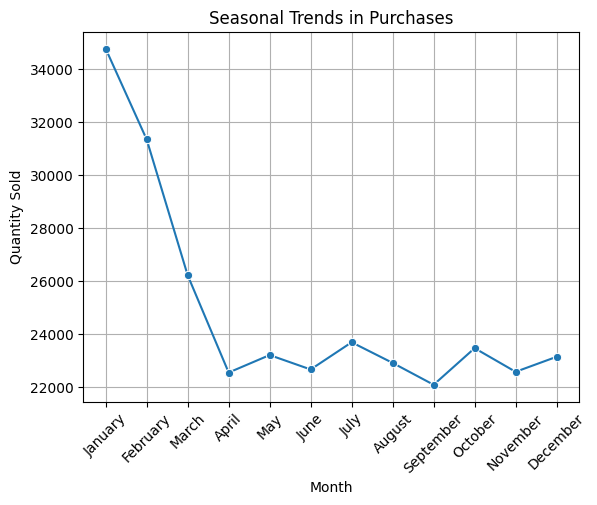

In [93]:
sns.lineplot(x='month', y='quantity', data=monthly_sales, marker='o')
plt.title('Seasonal Trends in Purchases')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.grid(True)
plt.show()

Sales exhibit a seasonal trend, peaking in January, likely due to post-holiday shopping or New Year promotions. From January, sales gradually decline until April, suggesting a period of reduced consumer activity. However, there is a noticeable uptick around July, potentially driven by mid-year sales or summer-related demand. Sales then remain steady but start to rise again from mid-October, possibly due to preparations for end-of-year festivities or holiday shopping. This trend reflects distinct seasonal shopping behaviors, with high activity during key periods such as the start and end of the year.